In [1]:
#standard imports
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import os
import re

from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#nltk nlp library
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
#getting the data
data = pd.read_csv(r'./data.csv')

In [3]:
data.head()

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [4]:
#we got to  add an id for each of the genres, so let's check how many genre there are and then map them to an id
#genre_names = sorted(data['genre'].unique())
#genre_mappings = {}
#for i, name in enumerate(genre_names):
#    genre_mappings[name] =i 
#genre_mappings

In [5]:
#data['genre_id'] = data['genre'].map(genre_mappings)
data = data.drop('index', axis=1)
#data.head()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

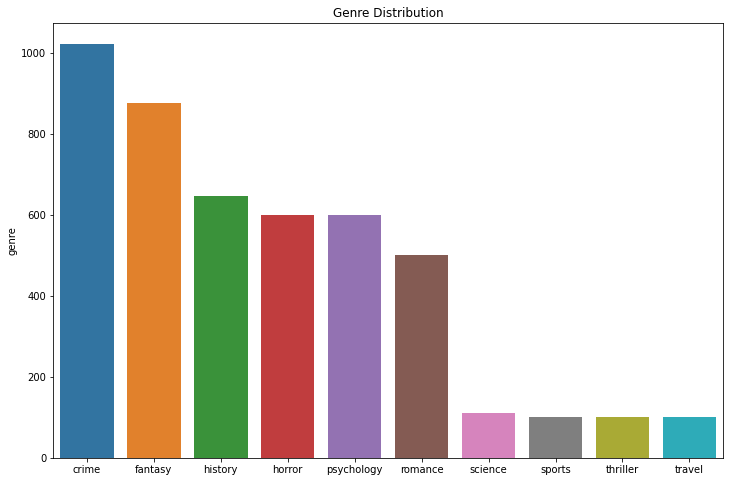

In [6]:
#mapping genres to the dataset:
genre_names = sorted(data['genre'].unique())
class_mappings={}
for i, name in enumerate(genre_names) :
    class_mappings[name] = i

#plotting the genre distribution throughout the whole dataset

genre_distribution = data.genre.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(x=genre_names, y=genre_distribution)
plt.title("Genre Distribution")
plt.plot #look like crime genre is waaay more present than other genre, we'll try first without changing the data
#and then we'll see.

In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))   #loading stop words, i.e the most common words used in english 
                                               #in this case
def preprocess(text, index, column):
    string = ""
    text = re.sub('[^a-zA-Z0-9\n]', ' ', text) #replaces special chars with single space
    text = re.sub('\s+',' ', text)             #replaces multiple spaces with single space
    text = text.lower()                        #converts all chars into lower case
    for word in text.split():                  #splits by spaces
        if not word in stop_words :            #if that word isn't a stop word then get it
            string += word + " "
    data[index][column] = string


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/MacArthur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
pos_data = data.head(4)
pos_data['POS_Tagging'] = np.nan

embedding_data =  data.head(4)
embedding_data['POS_Tagging'] = np.nan

/var/folders/b8/4rt4232d25lfcbqgf1dykzf80000gn/T/ipykernel_10828/1874684122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_data['POS_Tagging'] = np.nan
/var/folders/b8/4rt4232d25lfcbqgf1dykzf80000gn/T/ipykernel_10828/1874684122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embedding_data['POS_Tagging'] = np.nan


In [32]:
nltk.download('punkt') #nltk extension adds a tokenizer to split a text by sentences by using an unsupervised 
              #algorithm to build a model for abbreviation words, collocations, and words that start sentences
nltk.download('averaged_perceptron_tagger') #used to tag words with their part of speech with another unsupervised
                                            #algorithm.
for index, row in pos_data.iterrows():
    if type(row['summary']) is str:
        text = word_tokenize(row['summary'])
        pos_data['POS_Tagging'][index] = nltk.pos_tag(text)
        
for index, row in embedding_data.iterrows():
    if type(row['summary']) is str:
        text = word_tokenize(row['summary'])
        embedding_data['POS_Tagging'][index] = text

[nltk_data] Downloading package punkt to /Users/MacArthur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/MacArthur/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/var/folders/b8/4rt4232d25lfcbqgf1dykzf80000gn/T/ipykernel_10828/822363881.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_data['POS_Tagging'][index] = nltk.pos_tag(text)
/var/folders/b8/4rt4232d25lfcbqgf1dykzf80000gn/T/ipykernel_10828/822363881.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
# Displaying POS Tagging for first 4 rows for SMS data
for index,row in pos_data.iterrows():
    print('Sentence '+str(index+1)+': ',row['summary'])
    print('Tagging: ',row['POS_Tagging'])
    print("\n")

Sentence 1:   Drowned Wednesday is the first Trustee among the Morrow Days who is on Arthur's side and wishes the Will to be fulfilled. She appears as a leviathan/whale and suffers from Gluttony. The book begins when Leaf is visiting Arthur and they are discussing the invitation that Drowned Wednesday sent him. Arthur had been admitted to hospital because of the damage done to his leg when he attempted to enter Tuesday's Treasure Tower. Suddenly, the hospital room becomes flooded with water as the two are transported to the Border Sea of the House. Leaf is snatched away by a large ship with green sails, known as the Flying Mantis, while Arthur remains in his bed. When the Medallion given him by the immortal called the Mariner apparently fails to summon help, Arthur is without hope. Eventually, a buoy marking the pirate Elishar Feverfew's treasure floats toward him. As soon as Arthur opens it, his hand is marked with a bloody red colour. Arthur now has the Red Hand, by which Feverfew ma

In [34]:
for index, row in embedding_data.iterrows():
    print('Tagging', row['POS_Tagging'])
    print("\n")

Tagging ['Drowned', 'Wednesday', 'is', 'the', 'first', 'Trustee', 'among', 'the', 'Morrow', 'Days', 'who', 'is', 'on', 'Arthur', "'s", 'side', 'and', 'wishes', 'the', 'Will', 'to', 'be', 'fulfilled', '.', 'She', 'appears', 'as', 'a', 'leviathan/whale', 'and', 'suffers', 'from', 'Gluttony', '.', 'The', 'book', 'begins', 'when', 'Leaf', 'is', 'visiting', 'Arthur', 'and', 'they', 'are', 'discussing', 'the', 'invitation', 'that', 'Drowned', 'Wednesday', 'sent', 'him', '.', 'Arthur', 'had', 'been', 'admitted', 'to', 'hospital', 'because', 'of', 'the', 'damage', 'done', 'to', 'his', 'leg', 'when', 'he', 'attempted', 'to', 'enter', 'Tuesday', "'s", 'Treasure', 'Tower', '.', 'Suddenly', ',', 'the', 'hospital', 'room', 'becomes', 'flooded', 'with', 'water', 'as', 'the', 'two', 'are', 'transported', 'to', 'the', 'Border', 'Sea', 'of', 'the', 'House', '.', 'Leaf', 'is', 'snatched', 'away', 'by', 'a', 'large', 'ship', 'with', 'green', 'sails', ',', 'known', 'as', 'the', 'Flying', 'Mantis', ',', 'w

In [36]:
#training and test sets :
y_true = data['genre'].values

# split the data into test and train by maintaining same distribution of output variable 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.2)

# split the train data into train and cross validation by maintaining same distribution of output varaible 
#'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [38]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in Cross Validation data:', cv_df.shape[0])

Number of data points in train data: 2980
Number of data points in test data: 932
Number of data points in Cross Validation data: 745


In [40]:
#using one hot encoder to encode the features of summary :
from sklearn.feature_extraction.text import CountVectorizer

sms_vectorizer = CountVectorizer()
train_feature_onehotCoding = sms_vectorizer.fit_transform(train_df['summary'])
test_feature_onehotCoding = sms_vectorizer.transform(test_df['summary'])
cv_feature_onehotCoding = sms_vectorizer.transform(cv_df['summary'])

In [43]:
sms_vectorizer.get_feature_names()

['00',
 '000',
 '00000',
 '00001',
 '007',
 '01',
 '03',
 '0380815583',
 '03a',
 '043',
 '051',
 '058',
 '0752876457',
 '08',
 '087',
 '10',
 '100',
 '1000',
 '10012',
 '100th',
 '101810',
 '102',
 '1020',
 '103',
 '1030',
 '104',
 '1045',
 '105',
 '1052',
 '1058',
 '1062',
 '108',
 '109',
 '1099',
 '10b',
 '10th',
 '11',
 '110',
 '11000',
 '110th',
 '112',
 '1121',
 '1125',
 '1139',
 '114',
 '1189',
 '1199',
 '11th',
 '12',
 '120',
 '1200',
 '122',
 '124',
 '125',
 '1250s',
 '1254',
 '126',
 '127',
 '1271',
 '1284',
 '1291',
 '12th',
 '13',
 '130',
 '1300',
 '1320',
 '1329',
 '1340',
 '1345',
 '1348',
 '1351',
 '1356',
 '137',
 '138',
 '13th',
 '14',
 '1410',
 '1416524525',
 '1450',
 '1460',
 '1461',
 '1471',
 '1478',
 '1491',
 '1492',
 '1493',
 '1499',
 '14th',
 '15',
 '150',
 '1500',
 '1529',
 '155',
 '1550s',
 '1583',
 '1590',
 '1590s',
 '1599',
 '15e',
 '15th',
 '16',
 '160',
 '1601',
 '1608',
 '1619',
 '1623',
 '1624',
 '1625',
 '1628',
 '1629',
 '1630',
 '1631',
 '1632',
 '1634'

In [44]:
#setting the targets
train_y = np.array(list(train_df['genre']))
test_y = np.array(list(test_df['genre']))
cv_y = np.array(list(cv_df['genre']))

In [47]:
print("train_feature_onehotCoding is converted feature using one-hot encoding method.")
print("The shape of train feature is:", train_feature_onehotCoding.shape)

train_feature_onehotCoding is converted feature using one-hot encoding method.
The shape of train feature is: (2980, 45026)


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,accuracy_score, log_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

#model testing with a classical Naive Bayes multinomial clf :
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
cv_log_error = []

for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_feature_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_feature_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_feature_onehotCoding)
    cv_log_error.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
    
best_alpha = np.argmin(cv_log_error)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_feature_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_feature_onehotCoding, train_y)

for alpha = 1e-05
Log Loss : 1.4296361038822092
for alpha = 0.0001
Log Loss : 1.3866652802987451
for alpha = 0.001
Log Loss : 1.3054499503737007
for alpha = 0.01
Log Loss : 1.2093775613671274
for alpha = 0.1
Log Loss : 1.18858957962294
for alpha = 1
Log Loss : 1.3669070634519809
for alpha = 10
Log Loss : 1.7463878904924273
for alpha = 100
Log Loss : 1.9833783200594015
for alpha = 1000
Log Loss : 2.0167590268190123
for alpha = 10000
Log Loss : 2.013254368082296


CalibratedClassifierCV(base_estimator=MultinomialNB(alpha=0.1))

In [65]:
predict_y = sig_clf.predict_proba(train_feature_onehotCoding)
print('For alpha = ', alpha[best_alpha]) 
print("The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_feature_onehotCoding)
print("The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_feature_onehotCoding)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For alpha =  0.1
The train log loss is: 0.4397979024735207
The cross validation log loss is: 1.18858957962294
The test log loss is: 1.1215986474666264



Log Loss : 1.18858957962294


<Figure size 864x576 with 0 Axes>

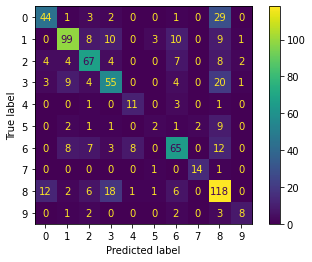




Classification Report:

              precision    recall  f1-score   support

       crime       0.70      0.55      0.62        80
     fantasy       0.79      0.71      0.74       140
     history       0.68      0.70      0.69        96
      horror       0.59      0.57      0.58        96
  psychology       0.55      0.69      0.61        16
     romance       0.29      0.11      0.16        18
     science       0.66      0.63      0.64       103
      sports       0.88      0.88      0.88        16
    thriller       0.56      0.72      0.63       164
      travel       0.67      0.50      0.57        16

    accuracy                           0.65       745
   macro avg       0.63      0.61      0.61       745
weighted avg       0.65      0.65      0.65       745



In [66]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_feature_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_feature_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_feature_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("")
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
plt.figure(figsize=(12,8))
dsp = ConfusionMatrixDisplay(confusion_matrix(cv_y, sig_clf.predict(cv_feature_onehotCoding.toarray())))
dsp.plot()
plt.show()
print("")
print("")
print("="*50)
print("")
print("Classification Report:")
print("")
print(classification_report(cv_y, sig_clf.predict(cv_feature_onehotCoding.toarray())))